# **1. Demszky et al. (2020) - GoEmotions (Google Research)**

In [54]:
#  Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import warnings
from itertools import combinations
warnings.filterwarnings('ignore')

# Displaying settings
pd.set_option('display.max_colwidth', 200)
sns.set(style='whitegrid')

In [55]:
# Uploading Files

from google.colab import files
uploaded = files.upload()

Saving goemotions_1.csv.zip to goemotions_1.csv.zip
Saving goemotions_2.csv.zip to goemotions_2.csv.zip
Saving goemotions_3.csv.zip to goemotions_3.csv.zip


In [57]:
# Unziping the Files

for filename in uploaded.keys():
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall()

print(" Extracted files:", os.listdir())


 Extracted files: ['.config', 'sadness-ratings-0to1.test.gold.txt', 'sadness-ratings-0to1.dev.gold (1).txt', 'sadness-ratings-0to1.dev.gold.txt', 'fear-ratings-0to1.test.gold (2).txt', 'sadness-ratings-0to1.test.gold (1).txt', 'joy-ratings-0to1.train (1).txt', 'anger-ratings-0to1.train (2).txt', 'joy-ratings-0to1.test.gold.txt', 'fear-ratings-0to1.test.gold.txt', 'anger-ratings-0to1.dev.gold (2).txt', 'fear-ratings-0to1.train.txt', 'anger-ratings-0to1.test.target.txt', 'anger-ratings-0to1.dev.gold (1).txt', 'joy-ratings-0to1.train (2).txt', 'goemotions_3.csv.zip', 'anger-ratings-0to1.dev.gold.txt', 'sadness-ratings-0to1.dev.gold (2).txt', 'joy-ratings-0to1.dev.gold.txt', 'goemotions_2.csv', 'anger-ratings-0to1.train (1).txt', 'anger-ratings-0to1.test.target (2).txt', 'fear-ratings-0to1.dev.gold.txt', 'fear-ratings-0to1.test.gold (1).txt', 'goemotions_1.csv', 'sadness-ratings-0to1.test.gold (2).txt', 'anger-ratings-0to1.test.target (1).txt', 'fear-ratings-0to1.train (1).txt', 'goemotion

In [59]:
# Loading and Combining CSV Files

df1 = pd.read_csv('goemotions_1.csv')
df2 = pd.read_csv('goemotions_2.csv')
df3 = pd.read_csv('goemotions_3.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)
print(" Combined shape:", df.shape)
df.head()

 Combined shape: (211225, 37)


,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,">sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of ""grouping""",eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Falcon.",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
# Cleaning
print(df.isnull().sum())

# Drop rows with missing text if any
df.dropna(subset=['text'], inplace=True)

# Clean text (remove HTML entities, etc.)
def preprocess(text_series):
    text_series = text_series.str.replace("(<br/>)", " ")
    text_series = text_series.str.replace('(<a).*(>).*(</a>)', ' ')
    text_series = text_series.str.replace('(&amp)', '&')
    text_series = text_series.str.replace('(&gt)', '>')
    text_series = text_series.str.replace('(&lt)', '<')
    text_series = text_series.str.replace('(\xa0)', ' ')
    return text_series

df['text'] = preprocess(df['text'])
print("Cleaned text sample:")
df['text'].head()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64
Cleaned text sample:


,text
0,That game hurt.
1,">sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of ""grouping"""
2,"You do right, if you don't care then fuck 'em!"
3,Man I love reddit.
4,"[NAME] was nowhere near them, he was by the Falcon."


In [61]:
# Sentiment Polarity and Text Stats

df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

df[['text', 'polarity', 'word_count', 'char_count']].head()

,text,polarity,word_count,char_count
0,That game hurt.,-0.400000,3,15
1,">sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of ""grouping""",0.000000,21,127
2,"You do right, if you don't care then fuck 'em!",-0.107143,10,46
3,Man I love reddit.,0.500000,4,18
4,"[NAME] was nowhere near them, he was by the Falcon.",0.100000,10,52


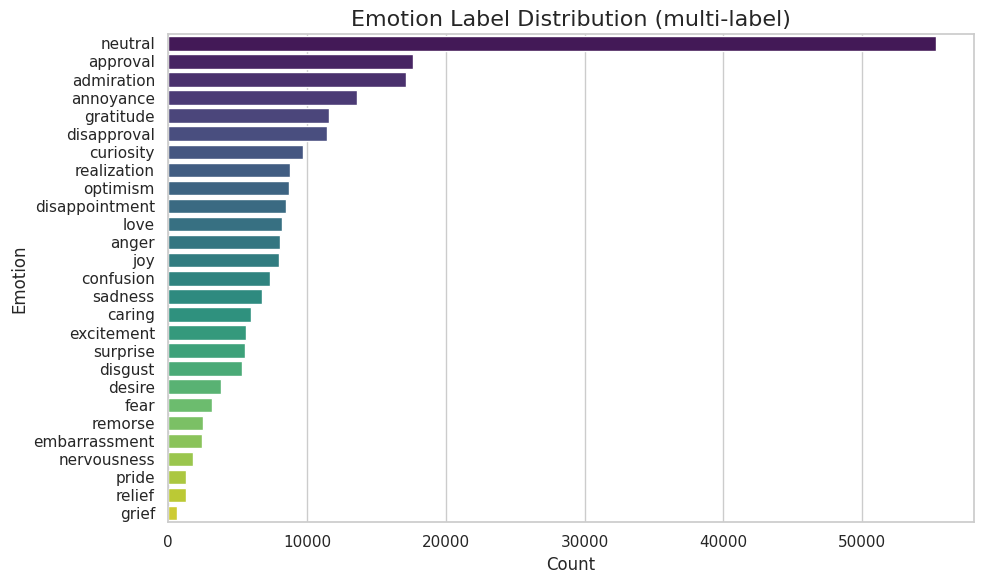

In [62]:
emotion_cols = ['admiration', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
                'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
                'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
                'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
                'remorse', 'sadness', 'surprise', 'neutral']

#  Melting the dataframe for multi-label handling

df_melted = df.melt(
    id_vars=[],                 # No other id columns needed for counting
    value_vars=emotion_cols,    # Columns to unpivot
    var_name='emotion',         # Name of the new column for emotion names
    value_name='value'          # Name of the new column for values
)

# Keep only the emotions present (value == 1)
df_melted = df_melted[df_melted['value'] == 1]

#  Ploting the distribution

plt.figure(figsize=(10,6))
sns.countplot(
    y='emotion',
    data=df_melted,
    order=df_melted['emotion'].value_counts().index,
    palette='viridis'
)
plt.title('Emotion Label Distribution (multi-label)', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Emotion', fontsize=12)
plt.tight_layout()
plt.show()

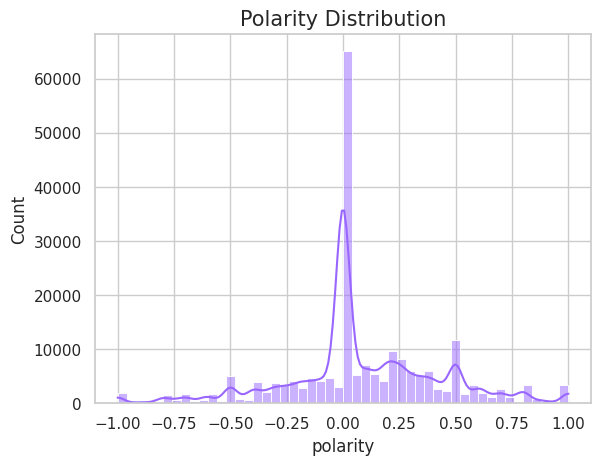

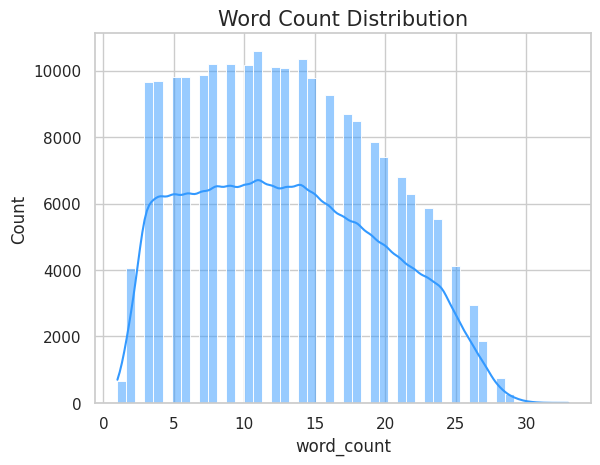

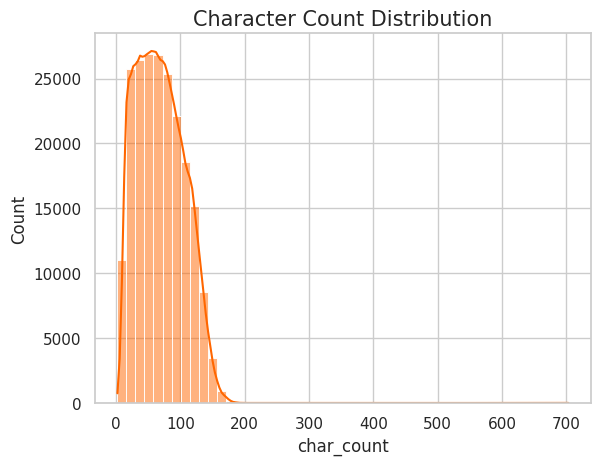

In [63]:
# Distribution of Polarity & Text Length

features = ['polarity', 'word_count', 'char_count']
titles = ['Polarity Distribution', 'Word Count Distribution', 'Character Count Distribution']
colors = ['#9966ff', '#3399ff', '#ff6600']

for feature, title, color in zip(features, titles, colors):
    sns.histplot(df[feature], bins=50, color=color, kde=True)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

In [64]:
# Example Texts by Polarity

print(" Positive samples:")
for text in df.loc[df.polarity > 0.5, 'text'].sample(5).values:
    print('-', text)

print("\n Neutral samples:")
for text in df.loc[(df.polarity > -0.1) & (df.polarity < 0.1), 'text'].sample(5).values:
    print('-', text)

print("\n Negative samples:")
for text in df.loc[df.polarity < -0.5, 'text'].sample(5).values:
    print('-', text)

 Positive samples:
- I'm sure your kind is fine the way it is
- What a beautiful moment
- I'm on mobile but clearly I need to get on desktop! edit: am on pc, is wonderful!
- *pounces on you* uwu you’re so warm
- Sounds good.

 Neutral samples:
- Thank you. I downvote all the lies I can, if I like them or not.
- He's trying!
- Did you know your post about your comment being downvoted is also being downvoted?
- Kept you waiting, huh? 
- I'm sitting here as he has never even lurked.

 Negative samples:
- This sub is very very bad at irony
- That is insane
- [NAME] gettin angry!
- It pains me to see [NAME] used in this abhorrent meme
- This is horrible. I just have one question about your title. Are you implying that hate as a concept is always a bad thing?


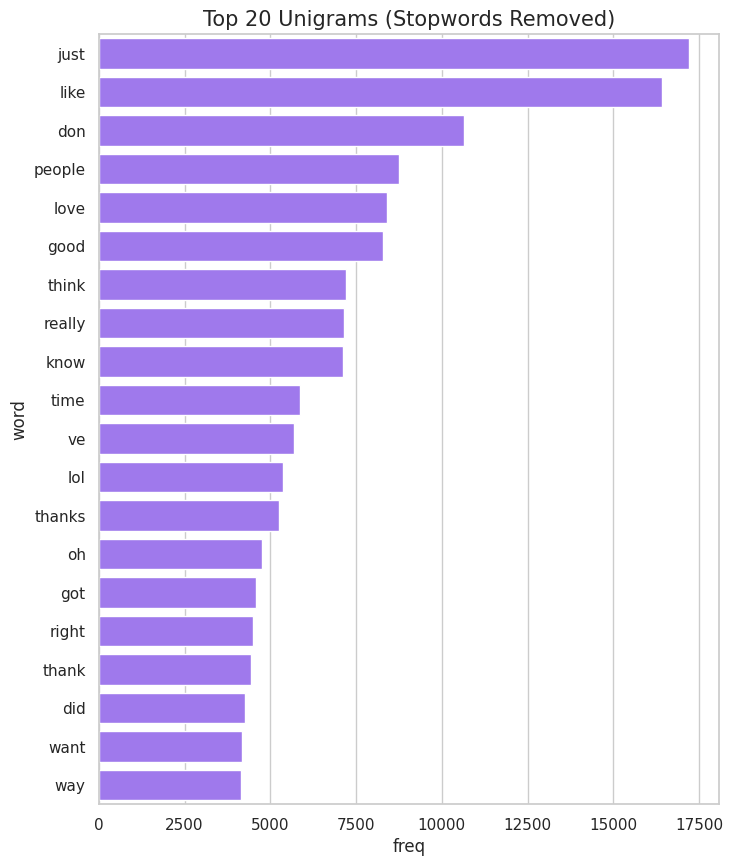

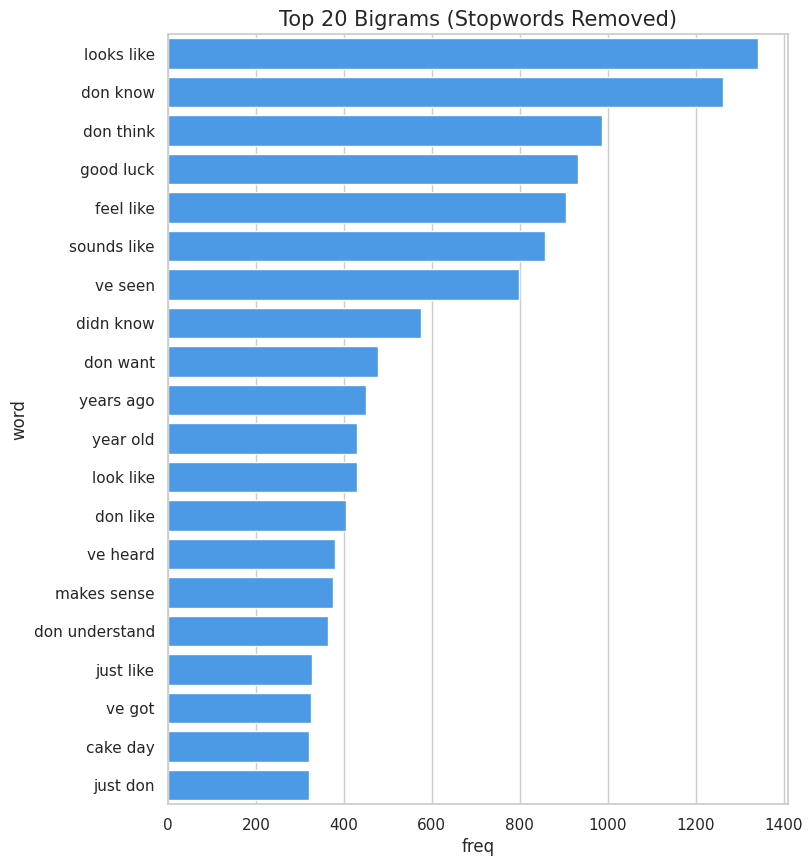

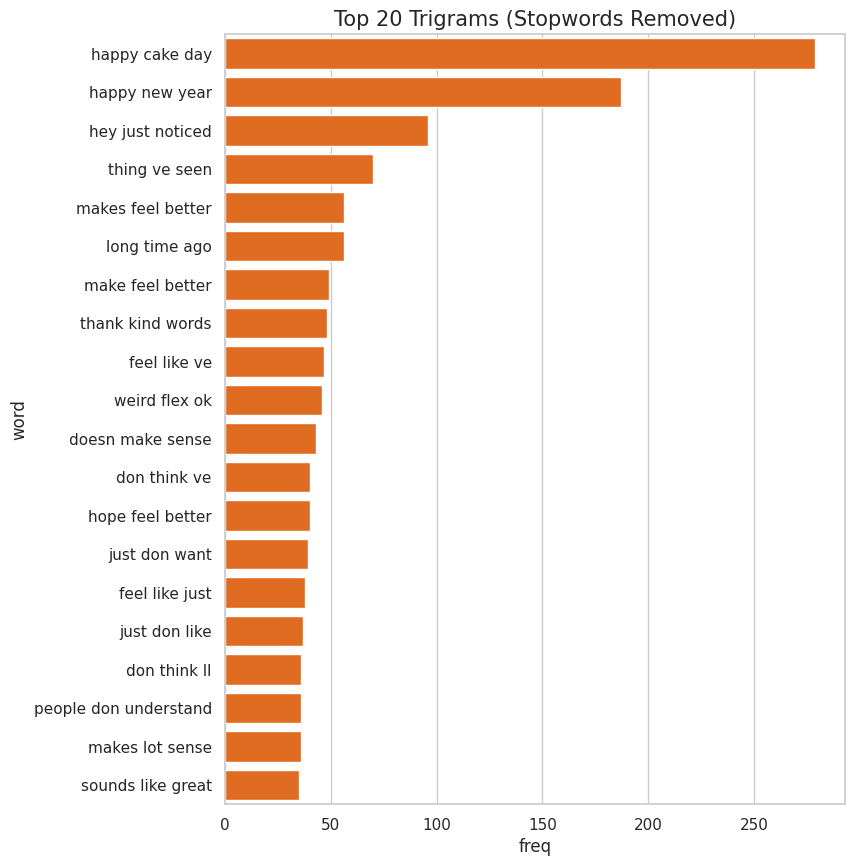

In [65]:

# N-gram Analysis

def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    common = words_freq[:n]
    return pd.DataFrame(common, columns=['word', 'freq'])

n = 20
unigrams = get_top_ngrams(df['text'], (1,1), stop_words='english', n=n)
bigrams = get_top_ngrams(df['text'], (2,2), stop_words='english', n=n)
trigrams = get_top_ngrams(df['text'], (3,3), stop_words='english', n=n)

plt.figure(figsize=(8,10))
sns.barplot(x='freq', y='word', data=unigrams, color='#9966ff')
plt.title('Top 20 Unigrams (Stopwords Removed)', size=15)
plt.show()

plt.figure(figsize=(8,10))
sns.barplot(x='freq', y='word', data=bigrams, color='#3399ff')
plt.title('Top 20 Bigrams (Stopwords Removed)', size=15)
plt.show()

plt.figure(figsize=(8,10))
sns.barplot(x='freq', y='word', data=trigrams, color='#ff6600')
plt.title('Top 20 Trigrams (Stopwords Removed)', size=15)
plt.show()

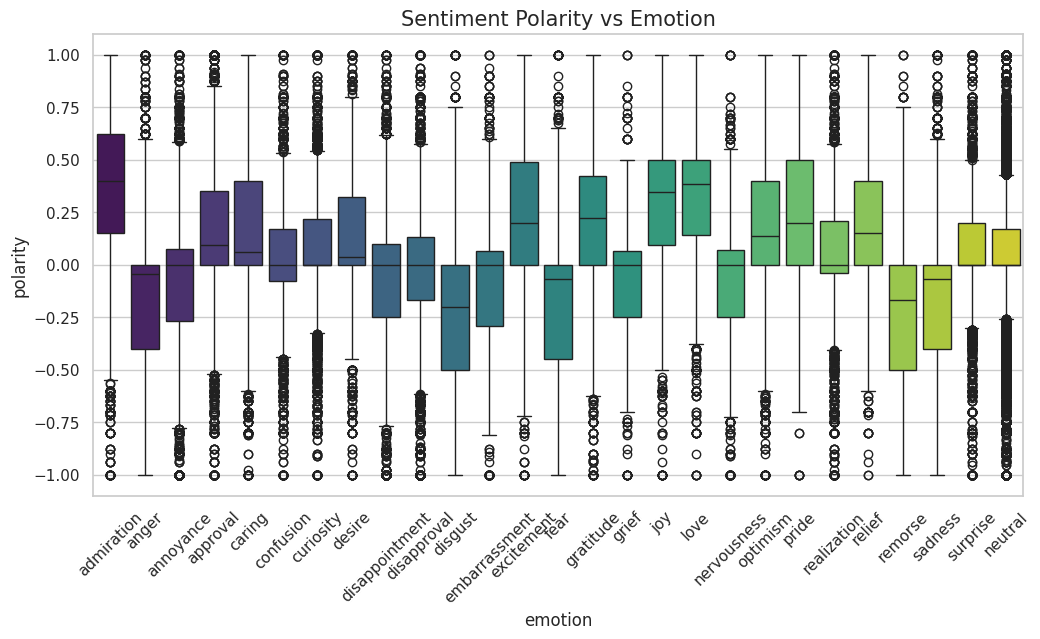

In [66]:
# Boxplots - Polarity vs Label

# Melt emotion columns
df_melted = df.melt(
    id_vars=['polarity'],
    value_vars=emotion_cols,
    var_name='emotion',
    value_name='value'
)

# Keep only rows with value == 1
df_melted = df_melted[df_melted['value'] == 1]

# Boxplot: Polarity vs Emotion
plt.figure(figsize=(12,6))
sns.boxplot(x='emotion', y='polarity', data=df_melted, palette='viridis')
plt.title('Sentiment Polarity vs Emotion', size=15)
plt.xticks(rotation=45)
plt.show()

In [67]:
# In Summary
df_melted = df.melt(
    id_vars=[],
    value_vars=emotion_cols,
    var_name='emotion',
    value_name='value'
)

# Keep only rows with value == 1
df_melted = df_melted[df_melted['value'] == 1]

print("Total emotion entries (multi-label):", len(df_melted))
print("Number of unique emotions:", df_melted['emotion'].nunique())
print("\nSample rows:")
df_melted.sample(27)

Total emotion entries (multi-label): 240284
Number of unique emotions: 27

Sample rows:


,emotion,value
671552,approval,1
233917,anger,1
5105504,sadness,1
3093344,gratitude,1
2539969,excitement,1
648904,approval,1
647263,approval,1
534654,annoyance,1
820350,approval,1
4566638,realization,1
